In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
import graphviz

In [4]:
housing_df = pd.read_csv('Housing.csv')

In [5]:
housing_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0.0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0.0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,NaN,0,0,2,1,semi-furnished


In [6]:
housing_df.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement            float64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus     object
dtype: object

In [7]:
columns_to_drop=['stories', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'guestroom', 'basement']

In [8]:
housing_df=housing_df.drop(columns_to_drop, axis=1)

In [9]:
housing_df.fillna(0)

,price,area,bedrooms,bathrooms,mainroad,parking,prefarea
0,13300000,7420,4,2,1,2,1
1,12250000,8960,4,4,1,3,0
2,12250000,9960,3,2,1,2,1
3,12215000,7500,4,2,1,3,1
4,11410000,7420,4,1,1,2,0
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0
541,1767150,2400,3,1,0,0,0
542,1750000,3620,2,1,1,0,0
543,1750000,2910,3,1,0,0,0


In [10]:
housing_df.head(3)

,price,area,bedrooms,bathrooms,mainroad,parking,prefarea
0,13300000,7420,4,2,1,2,1
1,12250000,8960,4,4,1,3,0
2,12250000,9960,3,2,1,2,1


In [11]:
housing_df.fillna(0)

,price,area,bedrooms,bathrooms,mainroad,parking,prefarea
0,13300000,7420,4,2,1,2,1
1,12250000,8960,4,4,1,3,0
2,12250000,9960,3,2,1,2,1
3,12215000,7500,4,2,1,3,1
4,11410000,7420,4,1,1,2,0
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0
541,1767150,2400,3,1,0,0,0
542,1750000,3620,2,1,1,0,0
543,1750000,2910,3,1,0,0,0


<Axes: >

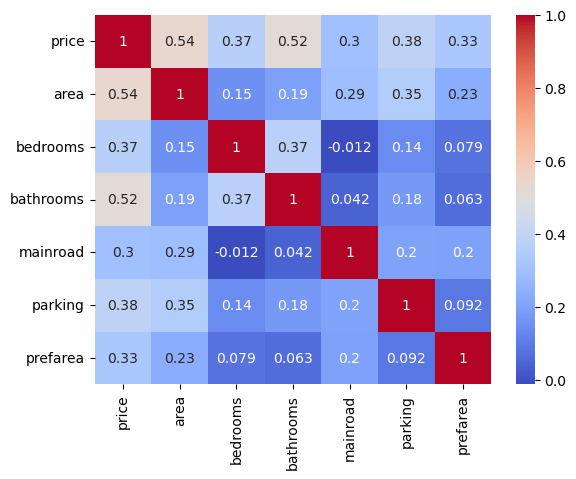

In [12]:
corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [13]:
X = housing_df.drop('mainroad', axis=1)
y = housing_df['mainroad']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
rf_model.fit(X_train, y_train)  
y_pred = rf_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8165137614678899
Precision: 0.575139146567718
Recall: 0.5574468085106383
Confusion Matrix:
 [[ 3 12]
 [ 8 86]]


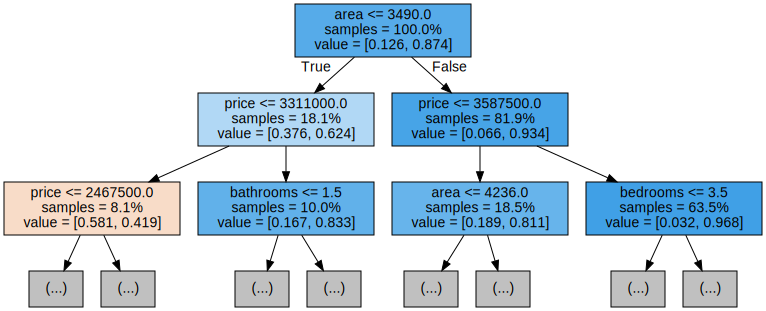

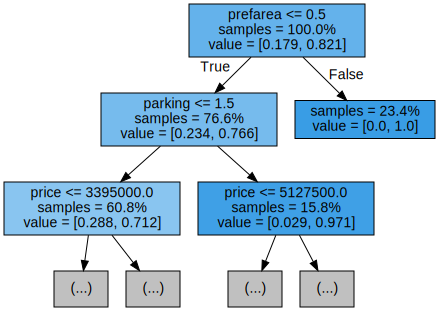

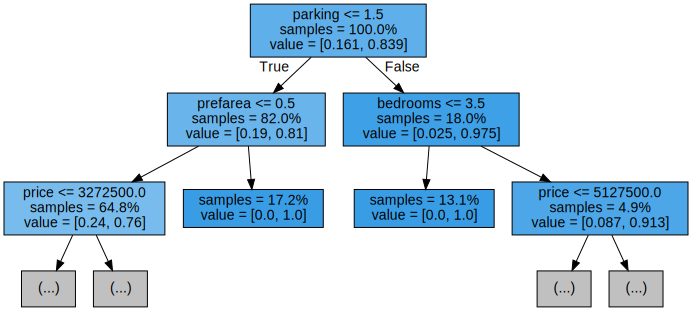

In [19]:
for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [20]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf_model = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf_model,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8d520af850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8d50dd9990>})

In [21]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf_model = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf_model,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 384}


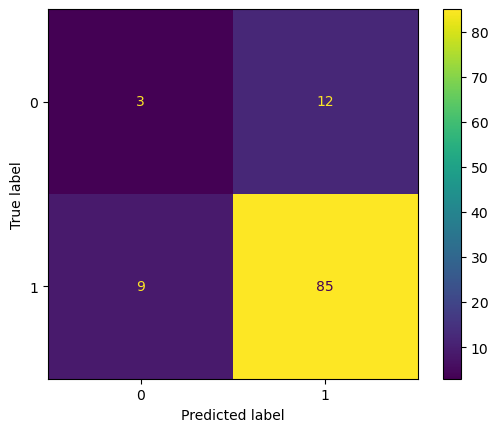

In [22]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [23]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8073394495412844
Precision: 0.8762886597938144
Recall: 0.9042553191489362


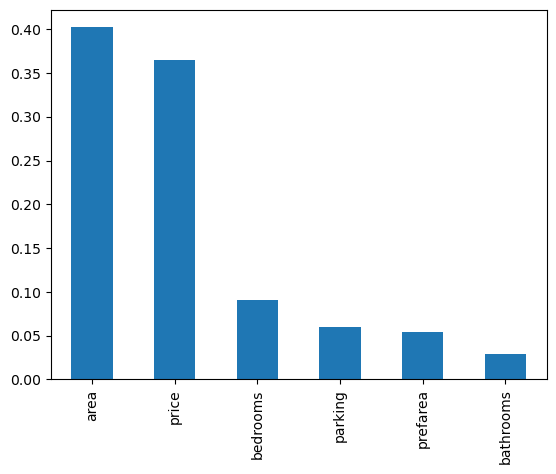

In [24]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();